In [45]:
import numpy as np 
import pandas as pd #data frames
from sklearn.model_selection import train_test_split #creating train and test splits
from sklearn.metrics import confusion_matrix, classification_report # model performance for logistic
import statsmodels.api as sm #regression models
import statsmodels.formula.api as smf # This allows you to use formulas inside statmodels functions
import pandas as pd
loan_data = pd.read_csv('/content/drive/MyDrive/2020_bexar.csv')

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import HTML
from ipywidgets import interact
import ipywidgets as widgets
import copy
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model as lm
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import LinearSVC, SVC
from mlxtend.plotting import plot_decision_regions
# Import classes from scikit-learn for logistic regression, LDA, QDA, and KNN classification
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif

%matplotlib inline

In [47]:
loan_data.head()


,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,...,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802917e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,1,1,2,2,2,335000,NaN,3.875,NaN,3,6266.76,NaN,2069.84,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,45-54,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7751,56.84,72200,163,2331,2763,11
1,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802918e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,31,1,2,2,2,325000,NaN,3.0,NaN,2,2662.7,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,...,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,35-44,35-44,No,No,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4610,42.69,72200,138,1558,1968,42
2,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802912e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,3,31,1,2,2,2,215000,NaN,2.25,NaN,2,4033.44,NaN,1346.04,NaN,NaN,360,NaN,NaN,2,2,2,2,215000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,35-44,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4664,63.14,72200,109,1020,1583,39
3,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802919e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,31,1,2,2,2,315000,NaN,3.0,NaN,2,1868.5,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,475000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,35-44,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11921,45.05,72200,166,2193,2564,12
4,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802916e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,2,1,1,2,2,2,185000,NaN,4.0,NaN,3,7610.72,NaN,1595.0,NaN,NaN,360,NaN,NaN,2,2,2,2,185000,1,...,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,35-44,35-44,No,No,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7623,85.54,72200,70,1187,2012,14


In [48]:
list(loan_data.columns)

['activity_year',
 'lei',
 'derived_msa_md',
 'state_code',
 'county_code',
 'census_tract',
 'conforming_loan_limit',
 'derived_loan_product_type',
 'derived_dwelling_category',
 'derived_ethnicity',
 'derived_race',
 'derived_sex',
 'action_taken',
 'purchaser_type',
 'preapproval',
 'loan_type',
 'loan_purpose',
 'lien_status',
 'reverse_mortgage',
 'open_end_line_of_credit',
 'business_or_commercial_purpose',
 'loan_amount',
 'combined_loan_to_value_ratio',
 'interest_rate',
 'rate_spread',
 'hoepa_status',
 'total_loan_costs',
 'total_points_and_fees',
 'origination_charges',
 'discount_points',
 'lender_credits',
 'loan_term',
 'prepayment_penalty_term',
 'intro_rate_period',
 'negative_amortization',
 'interest_only_payment',
 'balloon_payment',
 'other_nonamortizing_features',
 'property_value',
 'construction_method',
 'occupancy_type',
 'manufactured_home_secured_property_type',
 'manufactured_home_land_property_interest',
 'total_units',
 'multifamily_affordable_units',
 'in

In [49]:
loan_data.isna().any()

activity_year                        False
lei                                  False
derived_msa_md                       False
state_code                           False
county_code                          False
                                     ...  
ffiec_msa_md_median_family_income    False
tract_to_msa_income_percentage       False
tract_owner_occupied_units           False
tract_one_to_four_family_homes       False
tract_median_age_of_housing_units    False
Length: 99, dtype: bool

In [50]:
loan_data.shape

(145273, 99)

In [51]:
loan_data2 = loan_data[['action_taken','preapproval']]
loan_data2.head()

,action_taken,preapproval
0,6,2
1,6,2
2,6,2
3,6,2
4,6,2


In [52]:
loan_data2.value_counts()

action_taken  preapproval
1             2              70386
6             2              21456
4             2              21099
3             2              17580
5             2               9037
2             2               4669
1             1                930
2             1                 68
8             1                 35
7             1                 13
dtype: int64

In [53]:
loan_data2.sort_index()

,action_taken,preapproval
0,6,2
1,6,2
2,6,2
3,6,2
4,6,2
...,...,...
145268,6,2
145269,6,2
145270,6,2
145271,6,2


In [54]:
loan_data3 = loan_data[['action_taken','preapproval','loan_purpose','business_or_commercial_purpose',
 'loan_amount','applicant_age','income','debt_to_income_ratio','denial_reason_1','applicant_ethnicity_1','tract_population']]
loan_data3.head()

,action_taken,preapproval,loan_purpose,business_or_commercial_purpose,loan_amount,applicant_age,income,debt_to_income_ratio,denial_reason_1,applicant_ethnicity_1,tract_population
0,6,2,1,2,335000,45-54,345.0,NaN,10,4.0,7751
1,6,2,31,2,325000,35-44,294.0,NaN,10,4.0,4610
2,6,2,31,2,215000,35-44,NaN,NaN,10,4.0,4664
3,6,2,31,2,315000,35-44,225.0,NaN,10,4.0,11921
4,6,2,1,2,185000,35-44,95.0,NaN,10,4.0,7623


In [55]:
loan_data3.shape

(145273, 11)

In [56]:
loan_data3.dropna()

,action_taken,preapproval,loan_purpose,business_or_commercial_purpose,loan_amount,applicant_age,income,debt_to_income_ratio,denial_reason_1,applicant_ethnicity_1,tract_population
301,1,2,31,1,185000,45-54,163.0,41,10,2.0,5554
304,1,2,1,2,215000,35-44,58.0,38,10,3.0,5952
305,1,2,1,2,265000,25-34,54.0,41,10,2.0,10278
511,1,2,1,2,225000,35-44,110.0,47,10,2.0,6711
512,1,2,31,2,255000,45-54,66.0,30%-<36%,10,2.0,6729
...,...,...,...,...,...,...,...,...,...,...,...
144832,1,2,31,2,75000,25-34,50.0,30%-<36%,10,1.0,7419
144839,1,2,31,2,225000,35-44,62.0,47,10,1.0,3951
144841,3,2,32,2,85000,45-54,54.0,20%-<30%,9,1.0,3192
144851,1,2,31,2,185000,35-44,105.0,43,10,1.0,11197


In [57]:
loan_data3.loc[:,['action_taken','preapproval','loan_purpose','business_or_commercial_purpose',
 'loan_amount','applicant_age','income','debt_to_income_ratio','denial_reason_1','applicant_ethnicity_1']].describe()

,action_taken,preapproval,loan_purpose,business_or_commercial_purpose,loan_amount,income,denial_reason_1,applicant_ethnicity_1
count,145273.000000,145273.000000,145273.000000,145273.000000,1.452730e+05,1.084570e+05,145273.000000,145248.000000
mean,2.699869,1.992800,15.959986,15.198716,2.298320e+05,8.461438e+02,17.330867,2.209456
std,1.907082,0.084548,14.913136,120.370371,4.890923e+05,8.411068e+03,93.923128,1.578265
min,1.000000,1.000000,1.000000,1.000000,5.000000e+03,-7.840000e+02,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,1.450000e+05,5.600000e+01,10.000000,1.000000
50%,2.000000,2.000000,5.000000,2.000000,2.050000e+05,8.400000e+01,10.000000,2.000000
75%,4.000000,2.000000,31.000000,2.000000,2.750000e+05,1.310000e+02,10.000000,3.000000
max,8.000000,2.000000,32.000000,1111.000000,5.936500e+07,1.048698e+06,1111.000000,14.000000


In [58]:
loan_data['action_taken'].value_counts()

1    71316
6    21456
4    21099
3    17580
5     9037
2     4737
8       35
7       13
Name: action_taken, dtype: int64

KeyboardInterrupt: ignored

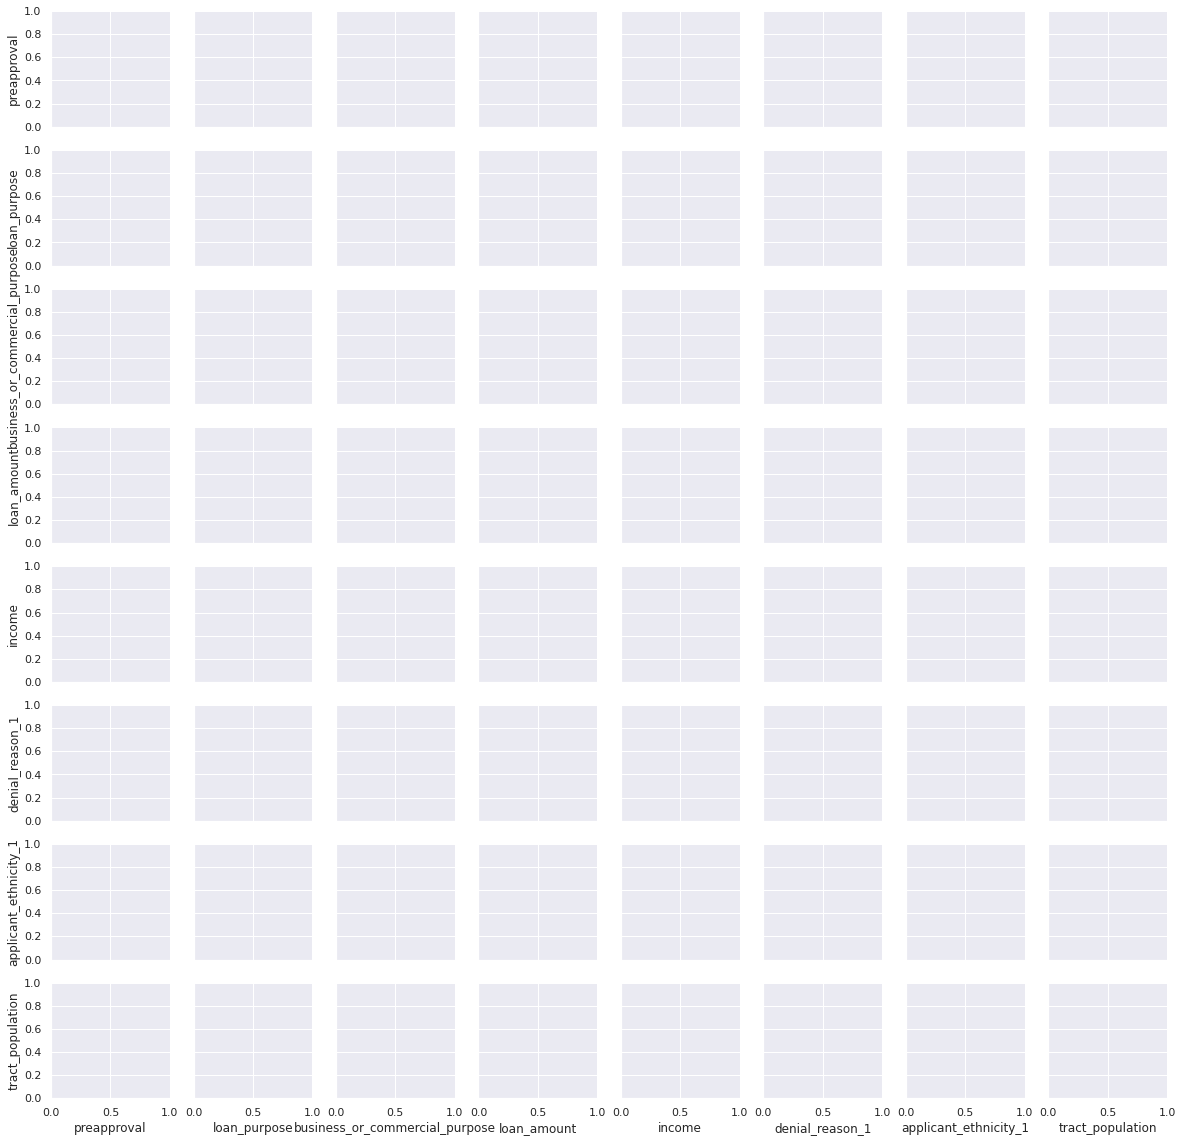

In [59]:
sns.pairplot(loan_data3, hue = "action_taken")

In [60]:
loan_data3.corr()

,action_taken,preapproval,loan_purpose,business_or_commercial_purpose,loan_amount,income,denial_reason_1,applicant_ethnicity_1,tract_population
action_taken,1.000000,0.059216,-0.107806,-0.042774,-0.030644,0.181068,-0.047178,0.239888,-0.000208
preapproval,0.059216,1.000000,0.085429,0.000364,-0.002228,0.008609,-0.004733,0.009852,0.002694
loan_purpose,-0.107806,0.085429,1.000000,0.033918,-0.001366,-0.061880,0.044275,-0.039248,0.008739
business_or_commercial_purpose,-0.042774,0.000364,0.033918,1.000000,0.014962,-0.007692,0.781102,-0.006225,-0.020782
loan_amount,-0.030644,-0.002228,-0.001366,0.014962,1.000000,-0.013333,-0.000668,0.034150,-0.004827
income,0.181068,0.008609,-0.061880,-0.007692,-0.013333,1.000000,-0.004178,-0.016390,0.002693
denial_reason_1,-0.047178,-0.004733,0.044275,0.781102,-0.000668,-0.004178,1.000000,-0.015426,-0.012346
applicant_ethnicity_1,0.239888,0.009852,-0.039248,-0.006225,0.034150,-0.016390,-0.015426,1.000000,0.007608
tract_population,-0.000208,0.002694,0.008739,-0.020782,-0.004827,0.002693,-0.012346,0.007608,1.000000


In [61]:
loan_data2.groupby('action_taken')['preapproval'].value_counts()

action_taken  preapproval
1             2              70386
              1                930
2             2               4669
              1                 68
3             2              17580
4             2              21099
5             2               9037
6             2              21456
7             1                 13
8             1                 35
Name: preapproval, dtype: int64

In [62]:
loan_data.groupby('loan_amount')['income'].mean()

loan_amount
5000        8769.466750
15000       1549.096369
25000         78.592831
35000         79.139017
45000        158.636430
               ...     
36045000            NaN
39915000            NaN
40725000            NaN
41185000            NaN
59365000            NaN
Name: income, Length: 306, dtype: float64

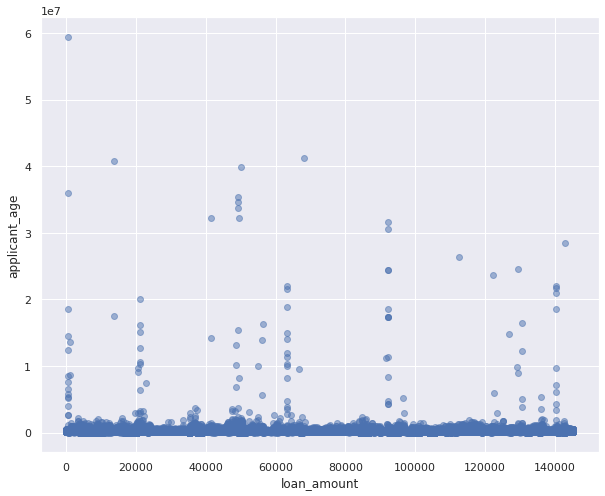

In [63]:
fig = plt.figure(figsize = (10, 8))
ax = plt.axes()
ax.scatter(x = loan_data.index, y = loan_data["loan_amount"],alpha = 0.5 )
ax.set(xlabel = "loan_amount", ylabel = "applicant_age");

In [64]:
loan_data4 = loan_data[['action_taken',
 'loan_amount','applicant_age','income','debt_to_income_ratio','denial_reason_1']]
loan_data3.head()

,action_taken,preapproval,loan_purpose,business_or_commercial_purpose,loan_amount,applicant_age,income,debt_to_income_ratio,denial_reason_1,applicant_ethnicity_1,tract_population
0,6,2,1,2,335000,45-54,345.0,NaN,10,4.0,7751
1,6,2,31,2,325000,35-44,294.0,NaN,10,4.0,4610
2,6,2,31,2,215000,35-44,NaN,NaN,10,4.0,4664
3,6,2,31,2,315000,35-44,225.0,NaN,10,4.0,11921
4,6,2,1,2,185000,35-44,95.0,NaN,10,4.0,7623


In [73]:
X=loan_data4.iloc[:,1:21]
y=loan_data4.iloc[:,0]

regr = lm.LinearRegression()
scores_regr = cross_val_score(regr, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_regr.mean()

nan

In [74]:
knn = KNeighborsRegressor()

param_grid = {'n_neighbors': np.arange(1, 25)}


knn_gscv = GridSearchCV(knn, param_grid, cv=5)


knn_gscv.fit(X, y)


knn_gscv.best_params_



scores_knn = cross_val_score(knn_gscv.best_estimator_, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_knn.mean()

ValueError: ignored

In [67]:
tree = DecisionTreeRegressor()

param_grid = {'max_depth': np.arange(1, 50)}

tree_gscv = GridSearchCV(tree, param_grid, cv=5)

tree_gscv.fit(X, y)

tree_gscv.best_params_

scores_tree = cross_val_score(tree_gscv.best_estimator_, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_tree.mean()

ValueError: ignored

In [71]:
np.sqrt(loan_data3.shape[1]-1)

3.1622776601683795

In [72]:
max_features = 4
tree_count   = 100

rando_for = RandomForestRegressor(max_features=max_features,random_state=0, n_estimators=tree_count)
scores_rf = cross_val_score(rando_for, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_rf.mean()

nan

In [75]:
max_features  = 4
learning_rate = 0.1
tree_count    = 100
max_depth = 4

gbm   = GradientBoostingRegressor(max_features=max_features, 
                                   random_state=1, 
                                   n_estimators=tree_count,
                                   learning_rate=learning_rate,
                                   max_depth = 4)
scores_gbm = cross_val_score(gbm, X, y, cv=5,scoring='neg_root_mean_squared_error')
-scores_gbm.mean()

nan